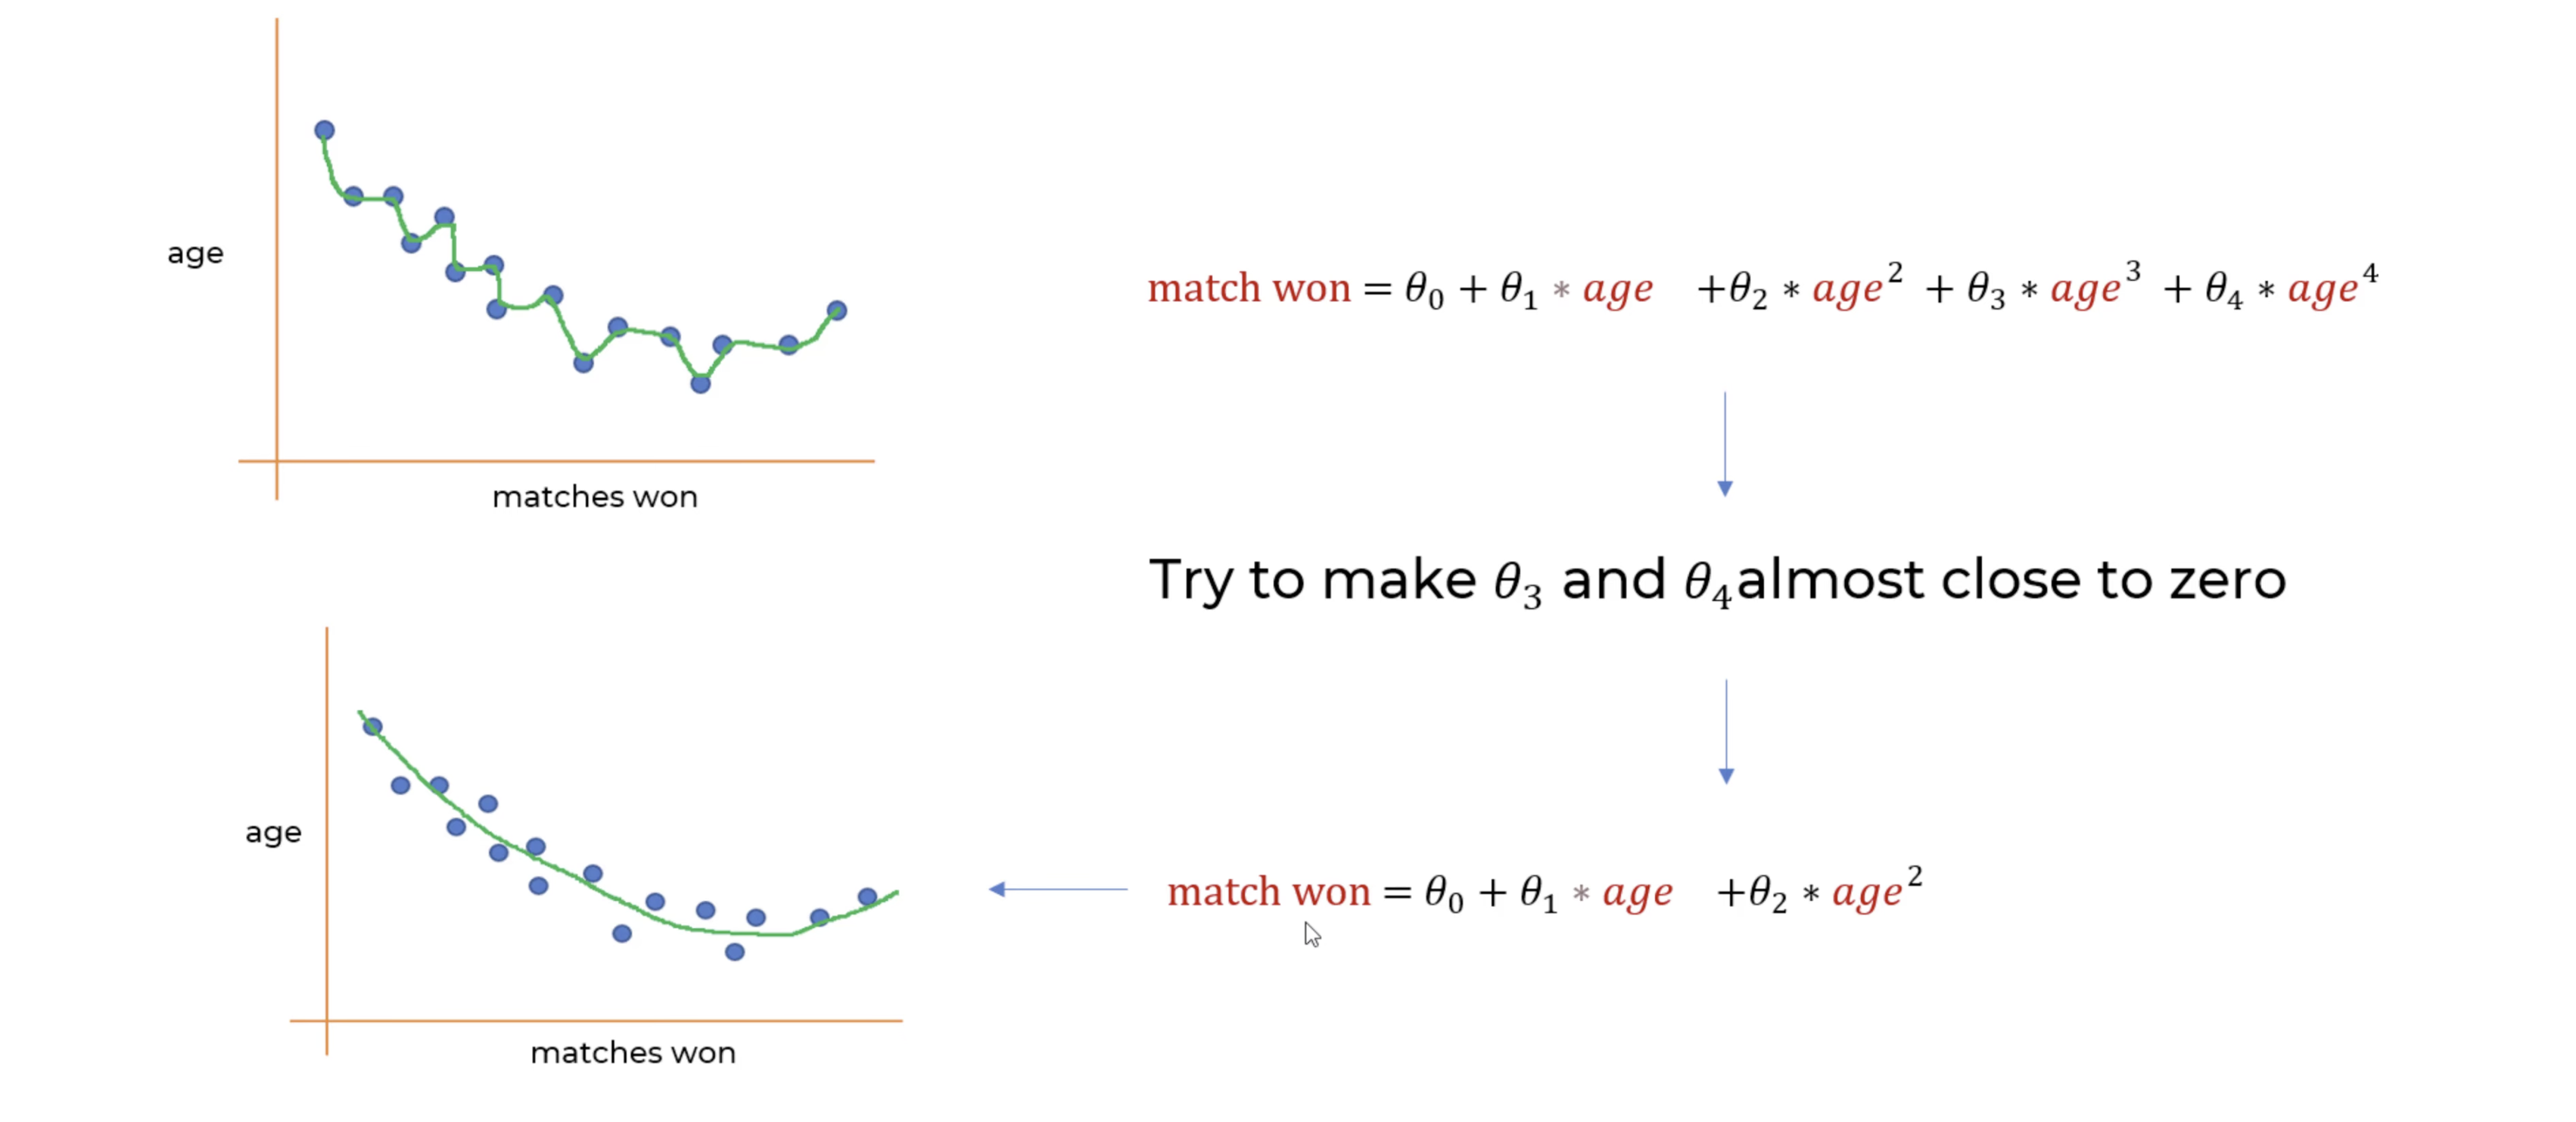

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [12]:
dataset = pd.read_csv('sample_data/Melbourne_housing_FULL.csv')
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [13]:
dataset.shape


(34857, 21)

In [14]:
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [15]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Method               0
SellerG              0
Regionname           3
Propertycount        3
Distance             1
CouncilArea          3
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
Price             7610
dtype: int64

In [16]:
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())
dataset.isna().sum()

<ipython-input-16-27b3aee8d8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)
<ipython-input-16-27b3aee8d8c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
<ipython-input-16-27b3aee8d8c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

Suburb              0
Rooms               0
Type                0
Method              0
SellerG             0
Regionname          3
Propertycount       0
Distance            0
CouncilArea         3
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
Price            7610
dtype: int64

In [17]:
dataset.dropna(inplace=True)
dataset.isna().sum()

<ipython-input-17-804bcec8f6e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)


Suburb           0
Rooms            0
Type             0
Method           0
SellerG          0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
Price            0
dtype: int64

In [18]:
dataset.shape

(27244, 15)

In [19]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,160.2564,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0000,1035000.0
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0000,1465000.0
5,Abbotsford,3,h,PI,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,94.0,160.2564,850000.0
6,Abbotsford,4,h,VB,Nelson,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,1.0,2.0,120.0,142.0000,1600000.0


In [20]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [21]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
regressor.score(x_test, y_test)

0.13853683161639851

In [25]:
regressor.score(x_train, y_train) # 0.68 vs 0.13 shows that the data was overfit

0.6827792395792723

In [26]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=50, max_iter=100, tol=0.1)
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.327e+15, tolerance: 7.963e+14
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=50, max_iter=100, tol=0.1)

In [27]:
model.score(x_test, y_test)

0.6636111369404489

In [28]:
model.score(x_train, y_train)

0.6766985624766824

In [29]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=50, max_iter=100, tol=0.1)
model.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [30]:
model.score(x_test, y_test)

0.6670848945194958

In [31]:
model.score(x_train, y_train)

0.6622376739684328